In [8]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now it's time for another guided example. This time we're going to look at recipes. Specifically we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.

What we want to see is if we can use the ingredient and keyword list to predict the rating. For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First let's load the dataset. It's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes). We'll use the csv file here and as pull out column names and some summary statistics for ratings.

In [9]:
raw_data = pd.read_csv('epi_r.csv')

In [10]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

Let's validate the idea a bit further with a histogram.

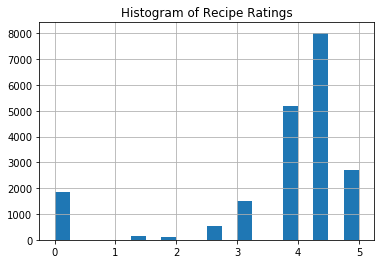

In [11]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')

plt.show()

So a few things are shown in this histogram. Firstly there are sharp discontinutities. We don't have continuous data. No recipe has a 3.5 rating, for example. Also we see the anticipated increase at 0.

Let's try a naive approach again, this time using SVM Regressor. But first, we'll have to do a bit of data cleaning.

In [12]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

What we can see right away is that nutrition information is not available for all goods. Now this would be an interesting data point, but let's focus on ingredients and keywords right now. So we'll actually drop the whole columns for calories, protein, fat, and sodium. We'll come back to nutrition information later.

In [13]:
from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

__Note that this actually takes quite a while to run, compared to some of the models we've done before. Be patient.__ It's because of the number of features we have.

Let's see what a scatter plot looks like, comparing actuals to predicted.

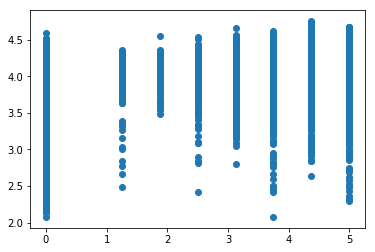

In [14]:
plt.scatter(Y, svr.predict(X))

Now that is a pretty useless visualization. This is because of the discontinous nature of our outcome variable. There's too much data for us to really see what's going on here. If you wanted to look at it you could create histograms, here we'll move on to the scores of both our full fit model and with cross validation. Again if you choose to run it again it will take some time, so you probably shouldn't.

In [15]:
svr.score(X, Y)

0.03856570651298896

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

array([0.01818511, 0.026411  , 0.03037705, 0.01957949, 0.02451197])

Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here. 

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

__And that is your challenge.__

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

When you've finished that, also take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

There is. Several things in fact, but most glaringly is that we don't actually have a random sample. It could be, and probably is, that the people more likely to choose some kinds of recipes are more likely to give high reviews.

After all, people who eat chocolate _might_ just be happier people.

In [17]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
raw_data.shape

(20052, 681)

In [18]:
raw_data['rating'].value_counts()

4.375    8019
3.750    5169
5.000    2719
0.000    1836
3.125    1489
2.500     532
1.250     164
1.875     124
Name: rating, dtype: int64

In [19]:
#Split rating into binary feature
raw_data['highly_rated'] = np.where(raw_data['rating'] >= 4, 1, 0)
raw_data['highly_rated'].value_counts()

1    10738
0     9314
Name: highly_rated, dtype: int64

In [20]:
#find benchmark
sum(raw_data['highly_rated'] == 1) / len(raw_data)

0.5355076800319171

### Benchmark of .535 recipes are considered highly rated.

In [14]:
# Warning Takes hours to run
from sklearn.svm import SVC

# Instantiate our model and fit the data.
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium', 'highly_rated'], 1)
Y = raw_data['highly_rated']
svm = SVC(kernel = 'linear')
svm.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
# Warning Takes hours to run
from sklearn.model_selection import cross_val_score
cross_val_score(svm, X, Y, cv=5)

array([0.58713538, 0.60034904, 0.60458738, 0.61645885, 0.61237216])

# RFE

In [ ]:
#Took hours and hours and never produced output

#Perform RFE to reduce features
#from sklearn.feature_selection import RFE

# Pass any estimator to the RFE constructor
#selector = RFE(svm)
#selector = selector.fit(X, Y)
#rankings = pd.DataFrame({'Features': X.columns, 'Ranking' : selector.ranking_})
#rankings.sort_values('Ranking')

# Reducing features through PCA

Covariance Matrix:
 [[ 2.99147408e-04 -1.49230474e-08 -2.53691805e-07 ... -4.17845326e-07
  -2.83537900e-07 -6.80490960e-06]
 [-1.49230474e-08  4.98703371e-05 -4.22819675e-08 ... -6.96408877e-08
  -4.72563167e-08 -1.13415160e-06]
 [-2.53691805e-07 -4.22819675e-08  8.47119220e-04 ... -1.18389509e-06
  -8.03357383e-07  3.05922471e-05]
 ...
 [-4.17845326e-07 -6.96408877e-08 -1.18389509e-06 ...  1.39448914e-03
   8.96387660e-04 -3.17562448e-05]
 [-2.83537900e-07 -4.72563167e-08 -8.03357383e-07 ...  8.96387660e-04
   9.46685792e-04 -2.15488804e-05]
 [-6.80490960e-06 -1.13415160e-06  3.05922471e-05 ... -3.17562448e-05
  -2.15488804e-05  2.22248348e-02]]


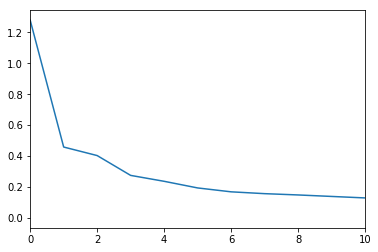

In [21]:
from sklearn.decomposition import PCA
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium', 'highly_rated'], 1)
Y = raw_data['highly_rated']

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
plt.plot(eig_val_cov)
plt.xlim((0, 10))
plt.show()


In [22]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)

In [23]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_pca, Y)
svm.score(X_pca, Y)

0.544983044085378

In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm, X_pca, Y, cv=5)

array([0.54749439, 0.54026427, 0.54649713, 0.53715711, 0.54527314])

#### The model performed slightly worse using the PCA features but it was a lot faster. 

# Reducing features through F value selector

In [19]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline

selector = SelectKBest(f_classif, k=30)
svm = SVC()
selector_svm = make_pipeline(selector, svm)

#Fitting & Cross-Validation.
selector_svm.fit(X,Y)
cross_val_score(selector_svm, X, Y, cv=5)

C:\Users\Loren\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [153 254 256 269 308 351 420 576 591 666] are constant.
  UserWarning)
C:\Users\Loren\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Loren\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [ 25 105 162 243 288 567 599 614 643] are constant.
  UserWarning)
C:\Users\Loren\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\Loren\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [  1  47 183 196 199 221 285 335 394 495 652 653] are constant.
  UserWarning)
C:\Users\Loren\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_s

array([0.56270257, 0.56818748, 0.57043131, 0.56708229, 0.57246196])

# Reducing Features Through most frequent keywords

In [26]:
df = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)

df2 = df[df['highly_rated'] == 0]
keywords = df2.sum().sort_values(ascending=False)[:30].index.tolist()
X2 = df[keywords]
Y2 = df['highly_rated']
X2.head()

,bon appétit,peanut free,soy free,gourmet,vegetarian,tree nut free,kosher,pescatarian,quick & easy,wheat/gluten-free,...,vegetable,dinner,kidney friendly,onion,vegan,sauté,tomato,milk/cream,kid-friendly,fruit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
keywords

['bon appétit',
 'peanut free',
 'soy free',
 'gourmet',
 'vegetarian',
 'tree nut free',
 'kosher',
 'pescatarian',
 'quick & easy',
 'wheat/gluten-free',
 'bake',
 'summer',
 'side',
 'dessert',
 'dairy free',
 'no sugar added',
 'winter',
 'fall',
 'sugar conscious',
 'healthy',
 'vegetable',
 'dinner',
 'kidney friendly',
 'onion',
 'vegan',
 'sauté',
 'tomato',
 'milk/cream',
 'kid-friendly',
 'fruit']

In [35]:
svm = SVC()
svm.fit(X2, Y2)
svm.score(X2, Y2)

0.5786953919808497

In [36]:
cross_val_score(svm, X2, Y2, cv=5)

array([0.56818748, 0.56868611, 0.56469708, 0.5798005 , 0.56921926])

# Tuning C Parameter

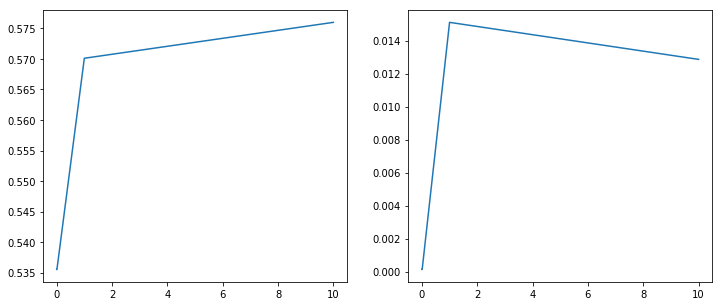

In [37]:
#Tuning lambda
mean_cvs = []
cvs_spread = []
alpha = []

C_param_range = [0.00001, 0.0001, 0.001, 0.01, 1, 10]

for i in C_param_range:
    svm = SVC(C=i)
    scores = cross_val_score(svm, X2, Y2, cv=5)
    mean_cvs.append(scores.mean())
    cvs_spread.append(scores.max()-scores.min())
    alpha.append(i)

alpha_df = pd.DataFrame({'mean_cvs': mean_cvs, 'cvs_spread': cvs_spread, 'alpha': alpha})

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(alpha_df.alpha, alpha_df.mean_cvs)

plt.subplot(1, 2, 2)
plt.plot(alpha_df.alpha, alpha_df.cvs_spread)

plt.show()

In [38]:
print(alpha_df)

   mean_cvs  cvs_spread     alpha
0  0.535508    0.000134   0.00001
1  0.535508    0.000134   0.00010
2  0.535508    0.000134   0.00100
3  0.535508    0.000134   0.01000
4  0.570118    0.015103   1.00000
5  0.576003    0.012861  10.00000


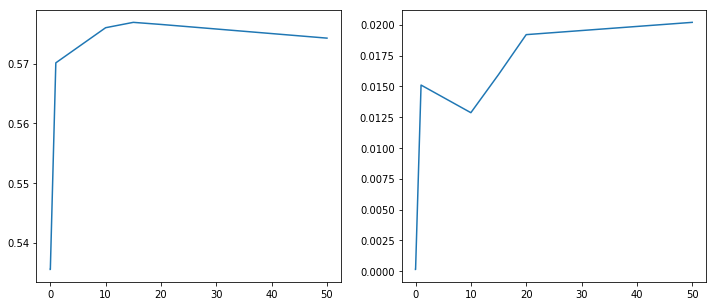

In [39]:
C_param_range = [10, 15, 20, 50]

for i in C_param_range:
    svm = SVC(C=i)
    scores = cross_val_score(svm, X2, Y2, cv=5)
    mean_cvs.append(scores.mean())
    cvs_spread.append(scores.max()-scores.min())
    alpha.append(i)

alpha_df = pd.DataFrame({'mean_cvs': mean_cvs, 'cvs_spread': cvs_spread, 'alpha': alpha})

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(alpha_df.alpha, alpha_df.mean_cvs)

plt.subplot(1, 2, 2)
plt.plot(alpha_df.alpha, alpha_df.cvs_spread)

plt.show()

In [40]:
print(alpha_df)

   mean_cvs  cvs_spread     alpha
0  0.535508    0.000134   0.00001
1  0.535508    0.000134   0.00010
2  0.535508    0.000134   0.00100
3  0.535508    0.000134   0.01000
4  0.570118    0.015103   1.00000
5  0.576003    0.012861  10.00000
6  0.576003    0.012861  10.00000
7  0.576900    0.015956  15.00000
8  0.576551    0.019197  20.00000
9  0.574257    0.020194  50.00000


### C = 10 seems to be the best balance between accuracy and not over fitting

In [41]:
svm = SVC(C=10)
cross_val_score(svm, X2, Y2, cv=5)

array([0.58040389, 0.57068063, 0.57117926, 0.58354115, 0.57420803])

# Tuning Kernal Parameter

In [49]:
mean_cvs = []
cvs_spread = []
kernel = []
kernel_param_range = ['linear', 'poly', 'rbf', 'sigmoid']

for i in kernel_param_range:
    svm = SVC(C=10, kernel = i)
    scores = cross_val_score(svm, X2, Y2, cv=5)
    mean_cvs.append(scores.mean())
    cvs_spread.append(scores.max()-scores.min())
    kernel.append(i)

tuning_df = pd.DataFrame({'mean_cvs': mean_cvs, 'cvs_spread': cvs_spread, 'kernel': kernel})

print(tuning_df)

   mean_cvs  cvs_spread   kernel
0  0.554408    0.011967   linear
1  0.546578    0.011947     poly
2  0.576003    0.012861      rbf
3  0.523190    0.031049  sigmoid


### The default 'rbf' kernel is the best choice.